In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import openvino
import ngraph as ng
import numpy as np
from openvino.inference_engine import IECore

In [2]:
%matplotlib notebook

C:\Users\mkowalski\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
camera = cv2.VideoCapture(0)

def grab_frame():
    ret, frame = camera.read()
    return frame

In [4]:
car_model_xml = "vehicle-detection-adas-0002\\FP32\\vehicle-detection-adas-0002.xml"
car_model_bin = "vehicle-detection-adas-0002\\FP32\\vehicle-detection-adas-0002.bin"

In [5]:
ie = IECore()

car_net = ie.read_network(model = car_model_xml, weights = car_model_bin)
car_exec_net = ie.load_network(network = car_net, device_name = "CPU")

In [6]:
ch, cw = 384, 672

<IPython.core.display.Javascript object>


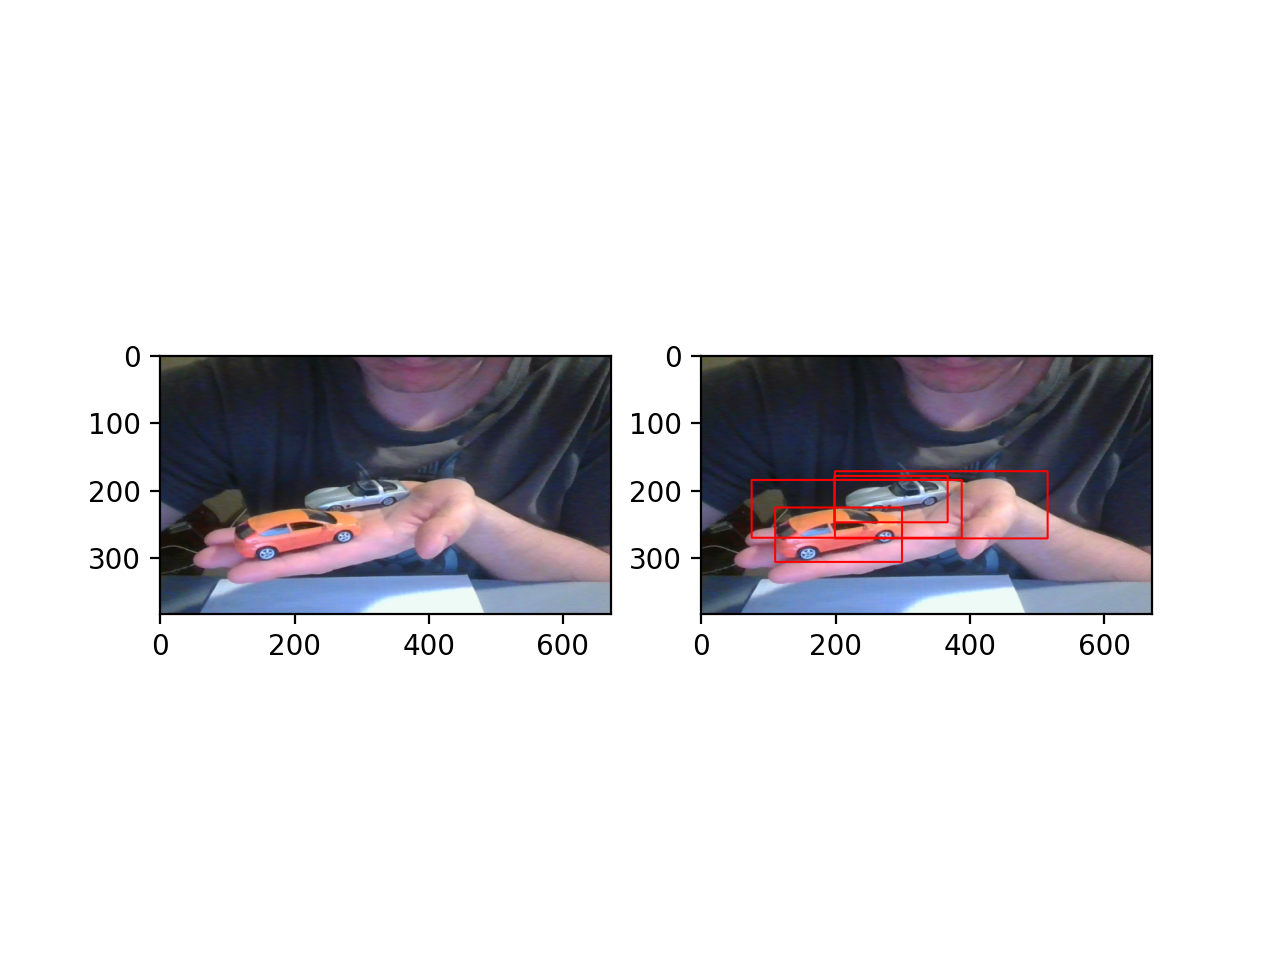

In [9]:
#create two subplots
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

#create two image plots
frame = cv2.resize(grab_frame(), (cw, ch))
im1 = ax1.imshow(frame)
im2 = ax2.imshow(frame)

def update(i):
    frame = cv2.resize(grab_frame(), (cw, ch))
    
    imin = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    imout = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    
    # face detection
    images = np.ndarray(shape = (1, 3, ch, cw))
    images[0] = frame.transpose((2, 0, 1))
        
    data = {}
    data["data"] = images
    output = car_exec_net.infer(inputs = data)
    
    t, t, n, v = output["detection_out"].shape
    for i in range(n):
        xmin = int(output["detection_out"][0][0][i][3] * cw)
        ymin = int(output["detection_out"][0][0][i][4] * ch)
        xmax = int(output["detection_out"][0][0][i][5] * cw)
        ymax = int(output["detection_out"][0][0][i][6] * ch)
    
        cv2.rectangle(imout, (xmin, ymin), (xmax, ymax), (255,0,0), 2)
 
    im1.set_data(imin)
    im2.set_data(imout)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cap1.release()

ani = FuncAnimation(plt.gcf(), update, interval=10)
plt.show()